<a href="https://colab.research.google.com/github/Sakshi-2149/OIBSIP_Project1/blob/main/Retail_Sale_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
files.upload()



Saving menu.csv to menu.csv
Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


{'menu.csv': b'Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)\nBreakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15\nBreakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,25,8,770,32,30,10,4,17,3,18,6,0,25,8\nBreakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,45,15,780,33,29,10,4,17,2,14,8,0,25,10\nBreakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,285,95,860,36,30,10,4,17,2,21,15,0,30,15\nBreakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,50,16,880,37,30,10,4,17,2,21,6,0,25,10\nBreakfast,Steak & Egg McMuffin,6

In [10]:
import os
os.listdir('/content')


['.config',
 'menu.csv',
 'retail_sales_dataset.csv',
 'retail_sales_dataset (1).csv',
 'sample_data']

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "font.size": 12
})


In [13]:
sales_df = pd.read_csv('/content/retail_sales_dataset.csv')
menu_df = pd.read_csv('/content/menu.csv')


In [14]:
print("--- SALES DATA PREVIEW ---")
display(sales_df.head())

print("--- MENU DATA PREVIEW ---")
display(menu_df.head())


--- SALES DATA PREVIEW ---


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


--- MENU DATA PREVIEW ---


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [15]:
print("--- SALES DATA INFO ---")
sales_df.info()

print("--- MENU DATA INFO ---")
menu_df.info()


--- SALES DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
--- MENU DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   I

In [16]:
print("--- MISSING VALUES ---")
display(sales_df.isnull().sum())


--- MISSING VALUES ---


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [17]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])


In [18]:
print("--- DESCRIPTIVE STATISTICS (TOTAL AMOUNT) ---")
print("Mean Sales   :", round(sales_df['Total Amount'].mean(), 2))
print("Median Sales :", round(sales_df['Total Amount'].median(), 2))
print("Mode Sales   :", sales_df['Total Amount'].mode()[0])
print("Std Dev      :", round(sales_df['Total Amount'].std(), 2))


--- DESCRIPTIVE STATISTICS (TOTAL AMOUNT) ---
Mean Sales   : 456.0
Median Sales : 135.0
Mode Sales   : 50
Std Dev      : 560.0


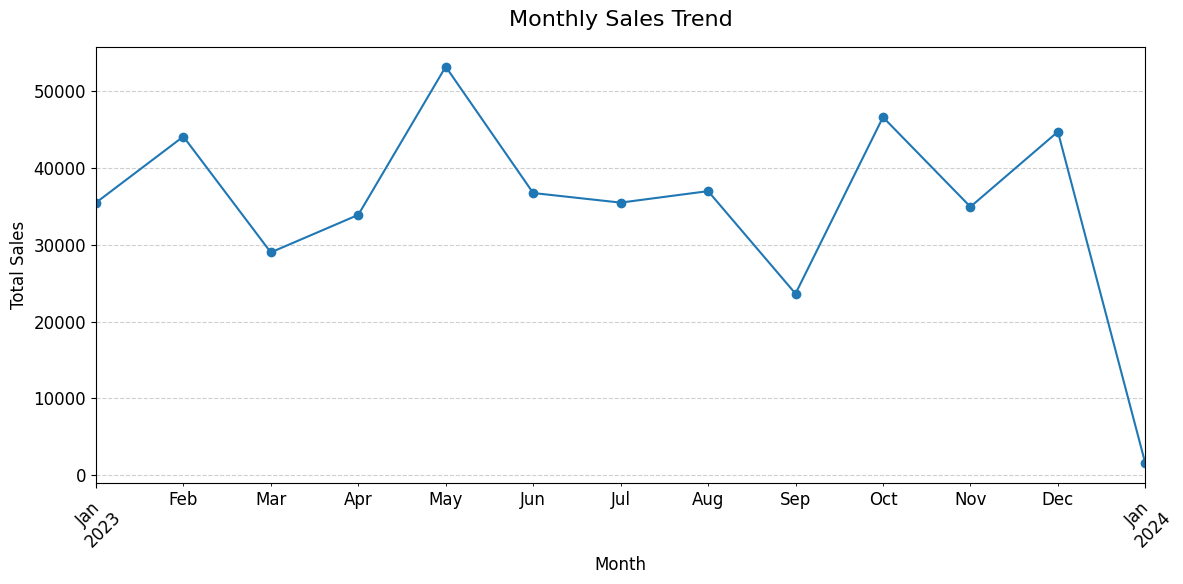

In [19]:
monthly_sales = (
    sales_df
    .groupby(sales_df['Date'].dt.to_period('M'))['Total Amount']
    .sum()
    .sort_index()
)

plt.figure()
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend", fontsize=16, pad=15)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


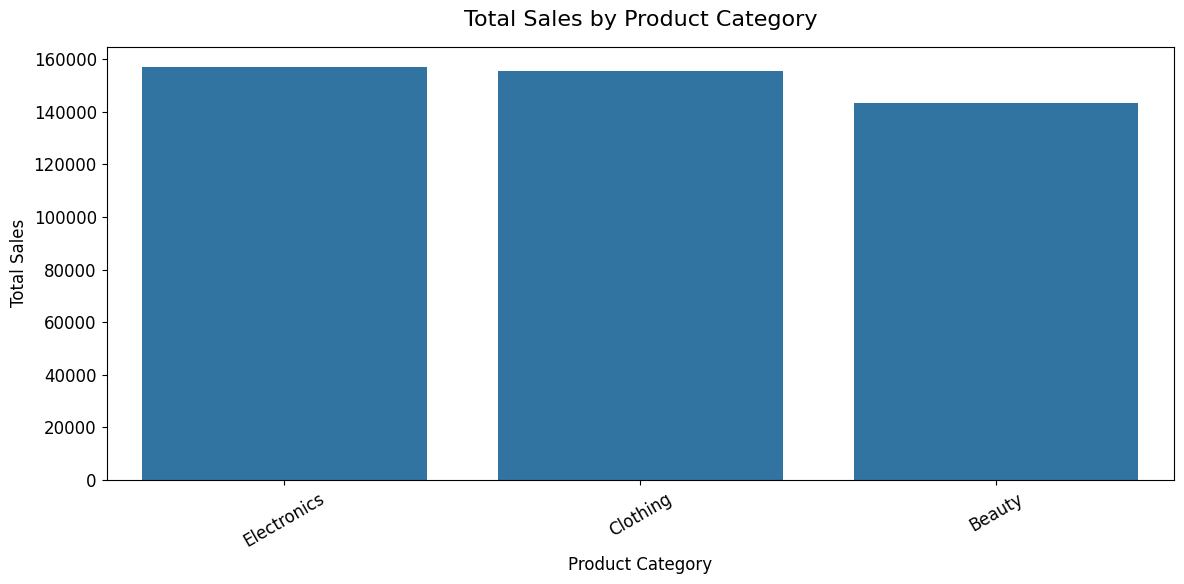

In [20]:
top_products = (
    sales_df
    .groupby('Product Category')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Total Sales by Product Category", fontsize=16, pad=15)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
